In [44]:
import pandas as pd
import seaborn as sns, numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

# 2. Study the data distribution in each attribute, share your findings


In [45]:
df = pd.read_csv("Bank_Personal_Loan_Modelling.csv")
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [46]:
df.shape

(5000, 14)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [48]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


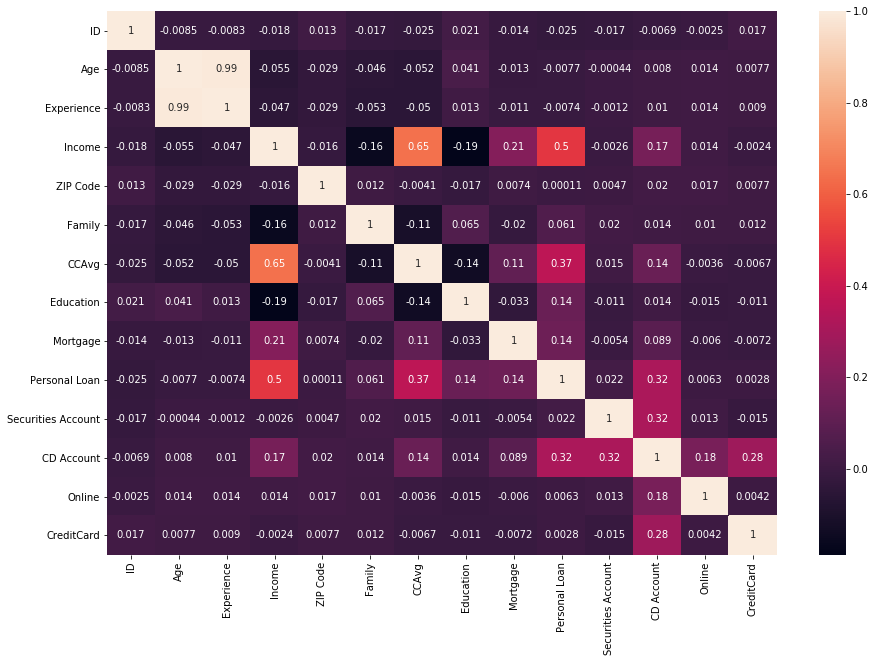

In [49]:
plt.subplots(figsize =(15, 10)) 
sns.heatmap(df.corr(),annot=True)

These two columns might not add any value and their correlation with Personal loan is also less. So these can be deleted from the dataframe.

In [50]:
del df['ID'] 
del df['ZIP Code']

In [51]:
df.isnull().values.any()

False

[25 45 39 35 37 53 50 34 65 29 48 59 67 60 38 42 46 55 56 57 44 36 43 40
 30 31 51 32 61 41 28 49 47 62 58 54 33 27 66 24 52 26 64 63 23]


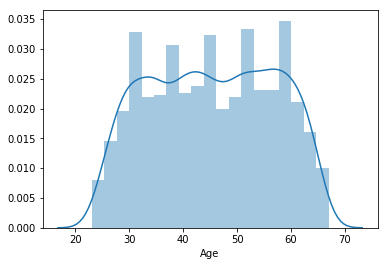

In [52]:
print(df['Age'].unique()) #To check if there are any ? or special characters
sns.distplot(df['Age'])

[ 1 19 15  9  8 13 27 24 10 39  5 23 32 41 30 14 18 21 28 31 11 16 20 35
  6 25  7 12 26 37 17  2 36 29  3 22 -1 34  0 38 40 33  4 -2 42 -3 43]
[ 1 19 15  9  8 13 27 24 10 39  5 23 32 41 30 14 18 21 28 31 11 16 20 35
  6 25  7 12 26 37 17  2 36 29  3 22 34  0 38 40 33  4 42 43]


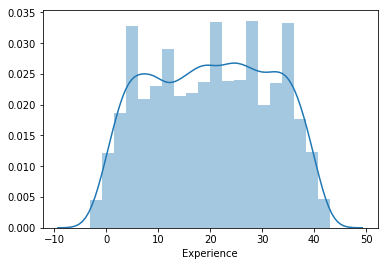

In [53]:
print(df['Experience'].unique()) #To check if there are any ? or special characters
sns.distplot(df['Experience'])
df['Experience']=abs(df['Experience']) #Converting negative values to absolute values
print(df['Experience'].unique())

[ 49  34  11 100  45  29  72  22  81 180 105 114  40 112 130 193  21  25
  63  62  43 152  83 158  48 119  35  41  18  50 121  71 141  80  84  60
 132 104  52 194   8 131 190  44 139  93 188  39 125  32  20 115  69  85
 135  12 133  19  82 109  42  78  51 113 118  64 161  94  15  74  30  38
   9  92  61  73  70 149  98 128  31  58  54 124 163  24  79 134  23  13
 138 171 168  65  10 148 159 169 144 165  59  68  91 172  55 155  53  89
  28  75 170 120  99 111  33 129 122 150 195 110 101 191 140 153 173 174
  90 179 145 200 183 182  88 160 205 164  14 175 103 108 185 204 154 102
 192 202 162 142  95 184 181 143 123 178 198 201 203 189 151 199 224 218]


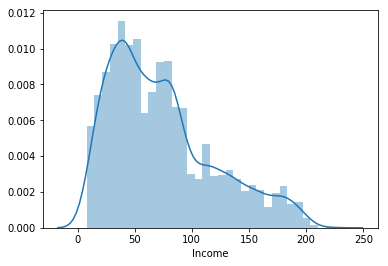

In [54]:
print(df['Income'].unique()) #To check if there are any ? or special characters
sns.distplot(df['Income'])

[ 1.6   1.5   1.    2.7   0.4   0.3   0.6   8.9   2.4   0.1   3.8   2.5
  2.    4.7   8.1   0.5   0.9   1.2   0.7   3.9   0.2   2.2   3.3   1.8
  2.9   1.4   5.    2.3   1.1   5.7   4.5   2.1   8.    1.7   0.    2.8
  3.5   4.    2.6   1.3   5.6   5.2   3.    4.6   3.6   7.2   1.75  7.4
  2.67  7.5   6.5   7.8   7.9   4.1   1.9   4.3   6.8   5.1   3.1   0.8
  3.7   6.2   0.75  2.33  4.9   0.67  3.2   5.5   6.9   4.33  7.3   4.2
  4.4   6.1   6.33  6.6   5.3   3.4   7.    6.3   8.3   6.    1.67  8.6
  7.6   6.4  10.    5.9   5.4   8.8   1.33  9.    6.7   4.25  6.67  5.8
  4.8   3.25  5.67  8.5   4.75  4.67  3.67  8.2   3.33  5.33  9.3   2.75]


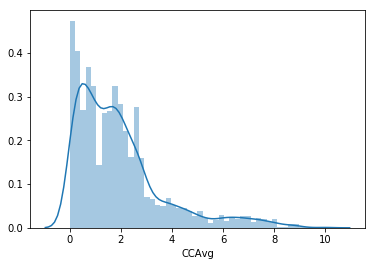

In [55]:
print(df['CCAvg'].unique()) #To check if there are any ? or special characters
sns.distplot(df['CCAvg'])

[  0 155 104 134 111 260 163 159  97 122 193 198 285 412 153 211 207 240
 455 112 336 132 118 174 126 236 166 136 309 103 366 101 251 276 161 149
 188 116 135 244 164  81 315 140  95  89  90 105 100 282 209 249  91  98
 145 150 169 280  99  78 264 113 117 325 121 138  77 158 109 131 391  88
 129 196 617 123 167 190 248  82 402 360 392 185 419 270 148 466 175 147
 220 133 182 290 125 124 224 141 119 139 115 458 172 156 547 470 304 221
 108 179 271 378 176  76 314  87 203 180 230 137 152 485 300 272 144  94
 208 275  83 218 327 322 205 227 239  85 160 364 449  75 107  92 187 355
 106 587 214 307 263 310 127 252 170 265 177 305 372  79 301 232 289 212
 250  84 130 303 256 259 204 524 157 231 287 247 333 229 357 361 294  86
 329 142 184 442 233 215 394 475 197 228 297 128 241 437 178 428 162 234
 257 219 337 382 397 181 120 380 200 433 222 483 154 171 146 110 201 277
 268 237 102  93 354 195 194 238 226 318 342 266 114 245 341 421 359 565
 319 151 267 601 567 352 284 199  80 334 389 186 24

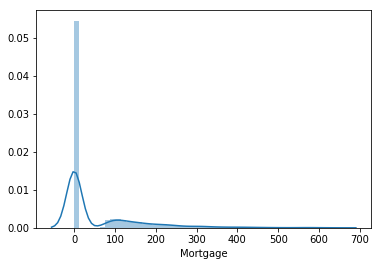

In [56]:
print(df['Mortgage'].unique()) #To check if there are any ? or special characters
sns.distplot(df['Mortgage'])

In [57]:
#To normalize all continuous variables as each of them are of different range
scaler = StandardScaler()
df[['Age','Experience','Income','CCAvg','Mortgage']] = scaler.fit_transform(df[['Age','Experience','Income','CCAvg','Mortgage']])
df[['Age','Experience','Income','CCAvg','Mortgage']] = scaler.transform(df[['Age','Experience','Income','CCAvg','Mortgage']])

[4 3 1 2]


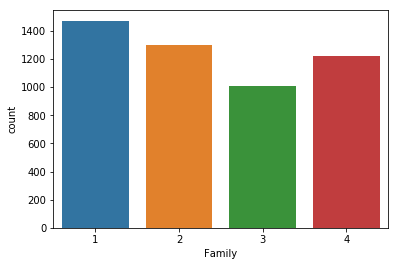

In [58]:
print(df['Family'].unique())# To check if there are any missing values in the form of ? or etc
sns.countplot(df['Family'])

In [59]:
df['Family'] = df['Family'].astype('category')
df=pd.concat([df,pd.get_dummies(df['Family'], prefix='Family')],axis=1)
del df['Family']

[1 2 3]


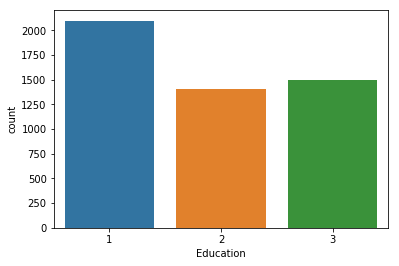

In [60]:
print(df['Education'].unique()) #To check if there are any missing values in the form of ? or etc
sns.countplot(df['Education'])

In [61]:
df['Education']=df['Education'].astype('category')
df=pd.concat([df,pd.get_dummies(df['Education'], prefix='Education')],axis=1)
del df['Education']

[1 0]


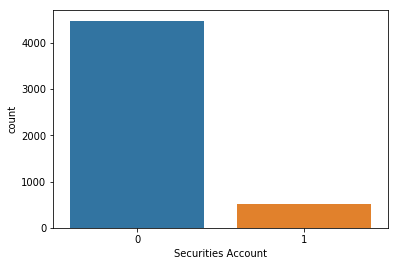

In [62]:
print(df['Securities Account'].unique()) #To check if there are any missing values in the form of ? or etc
sns.countplot(df['Securities Account'])

In [63]:
df['Securities Account']=df['Securities Account'].astype('category')
df=pd.concat([df,pd.get_dummies(df['Securities Account'], prefix='SecuritiesAccount')],axis=1)
del df['Securities Account']

[0 1]


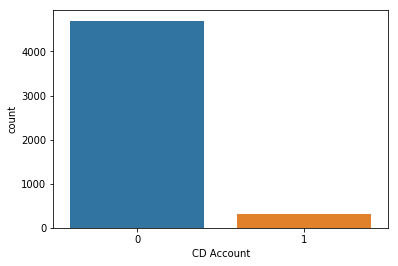

In [64]:
print(df['CD Account'].unique()) #To check if there are any missing values in the form of ? or etc
sns.countplot(df['CD Account'])

In [65]:
df['CD Account']=df['CD Account'].astype('category')
df=pd.concat([df,pd.get_dummies(df['CD Account'], prefix='CDAccount')],axis=1)
del df['CD Account']

[0 1]


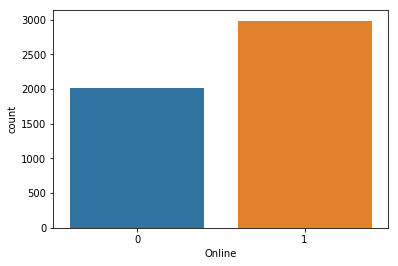

In [66]:
print(df['Online'].unique()) #To check if there are any missing values in the form of ? or etc
sns.countplot(df['Online'])

In [67]:
df['Online']=df['Online'].astype('category')
df=pd.concat([df,pd.get_dummies(df['Online'], prefix='Online')],axis=1)
del df['Online']

[0 1]


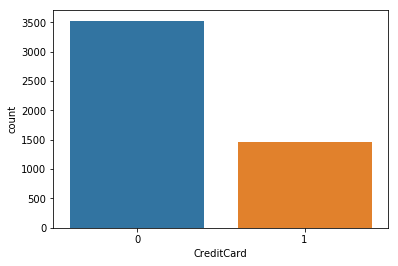

In [68]:
print(df['CreditCard'].unique()) #To check if there are any missing values in the form of ? or etc
sns.countplot(df['CreditCard'])

In [69]:
df['CreditCard']=df['CreditCard'].astype('category')
df=pd.concat([df,pd.get_dummies(df['CreditCard'], prefix='CreditCard')],axis=1)
del df['CreditCard']

# 3.Get the target column distribution. Your comments

In [70]:
df['Personal Loan'].unique() #To check if there are any missing values in the form of ? or etc
df['Personal Loan']=df['Personal Loan'].astype('category')

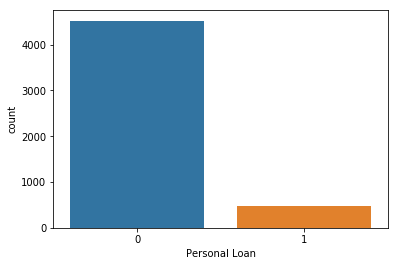

In [71]:
sns.countplot(df['Personal Loan'])

In [72]:
print(len(df[df['Personal Loan']==0].index),",",len(df[df['Personal Loan']==1].index))

4520 , 480


Highly Imbalanced data as the number of people who took loan is very less when compared to number of people who 
didn't take the loan.

# 4.Split the data into training and test set in the ratio of 70:30 respectively

In [73]:
X=df.loc[:, df.columns != 'Personal Loan']
y=df['Personal Loan']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# 5 & 6. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans .Print the confusion matrix for all the above models

# Logistic Regression

In [74]:
clf = LogisticRegression(random_state=0).fit(X, y)
y_train_pred = clf.predict(X_train)
y_pred = clf.predict(X_test)
print("Train Accuracy:",accuracy_score(y_train, y_train_pred))
print("Test Accuracy:",accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))    

Train Accuracy: 0.9405714285714286
Test Accuracy: 0.93
[[1343    8]
 [  97   52]]


# KNN Classifier

In [75]:
X=df.loc[:, df.columns != 'Personal Loan']
y=df['Personal Loan']
X_train, X_test, y_train, y_test = train_test_split(np.array(X),np.array(y), test_size=0.3, random_state=1)
clf = KNeighborsClassifier(n_neighbors=3).fit(X_train,y_train)
y_train_pred = clf.predict(X_train)
y_train_pred = clf.predict(X_train)
y_pred = clf.predict(X_test)

print("Train Accuracy:",accuracy_score(y_train, y_train_pred))
print("Test Accuracy:",accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test,y_pred)) 

Train Accuracy: 0.9645714285714285
Test Accuracy: 0.932
[[1336   15]
 [  87   62]]


# Naive Bayes Classifier

In [77]:
X=df.loc[:, df.columns != 'Personal Loan']
y=df['Personal Loan']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
clf = GaussianNB().fit(X_train,y_train)
y_train_pred = clf.predict(X_train)
y_train_pred = clf.predict(X_train)
y_pred = clf.predict(X_test)

print("Train Accuracy:",accuracy_score(y_train, y_train_pred))
print("Test Accuracy:",accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

Train Accuracy: 0.8988571428571429
Test Accuracy: 0.8933333333333333
[[1265   86]
 [  74   75]]


# 7.Give your reasoning on which is the best model in this case and why it performs better?

KNN Classifier looks like it is performing better by comparing the accuracy scores. Logistic Regression has good accuracy scores but KNN performed better while training the data. Naive Bayes has less accuracy scores compared to the other two.